In [209]:
import pandas as pd
import glob
import json
import numpy as np
import seaborn as sns
import requests
import matplotlib
import matplotlib.pyplot as plt
import locale # to format currency as USD
from matplotlib.ticker import FuncFormatter # to format currency on charts axis

api_key = '64bc8db1ac9143a7dbb820d7d420ac96'

In [210]:
!ls zippedData

PHASE 1 PROJECT.xlsx
bom.movie_gross.csv.gz
extra files
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz
~$PHASE 1 PROJECT.xlsx


In [211]:
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_df = tmdb_df.drop(columns = ['Unnamed: 0'])

In [212]:
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [213]:
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budget_df = budget_df.drop(columns = ['id','release_date'])

In [214]:
budget_df.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [215]:
df = tmdb_df.merge(budget_df, left_on='original_title', right_on='movie')

In [216]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,"$30,000,000","$191,796,233","$364,545,516"
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,"$30,000,000","$191,796,233","$364,545,516"
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,"$160,000,000","$292,576,195","$835,524,642"


In [217]:
#create function later
# https://www.youtube.com/watch?v=ox_AHkeqNJ0&ab_channel=AbhishekAgarrwal

df['production_budget'] = pd.to_numeric(df['production_budget'].replace('[^0-9\.-]', '', regex=True))
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'].replace('[^0-9\.-]', '', regex=True))
df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'].replace('[^0-9\.-]', '', regex=True))

In [218]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,165000000,217581232,494870992
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,170000000,312433331,621156389
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,30000000,191796233,364545516
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,30000000,191796233,364545516
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,160000000,292576195,835524642


In [219]:
df['gross_profit'] = df['worldwide_gross'] - df['production_budget']

In [220]:
df.head(20)

df[df['original_title'].str.match('Deepwater Horizon')]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
1835,"[18, 28]",296524,en,Deepwater Horizon,13.685,2016-09-30,Deepwater Horizon,6.7,2606,Deepwater Horizon,156000000,61433527,122603824,-33396176
1836,"[18, 28]",296524,en,Deepwater Horizon,13.685,2016-09-30,Deepwater Horizon,6.7,2606,Deepwater Horizon,156000000,61433527,122603824,-33396176


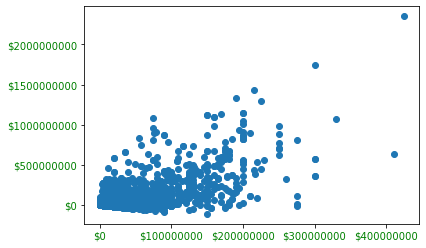

In [221]:
fig, ax = plt.subplots()

ax.scatter(df['production_budget'], df['gross_profit'])

ax.xaxis.set_major_formatter('${x:1.0f}')
ax.xaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
ax.yaxis.set_major_formatter('${x:1.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)

In [222]:
df_m = df

In [223]:
df_m['net_profit'] = df['worldwide_gross'] - (1.5 * df['production_budget'])

In [224]:
df_m.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,net_profit
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,165000000,217581232,494870992,329870992,247370992.0
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,170000000,312433331,621156389,451156389,366156389.0
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,30000000,191796233,364545516,334545516,319545516.0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,30000000,191796233,364545516,334545516,319545516.0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,160000000,292576195,835524642,675524642,595524642.0


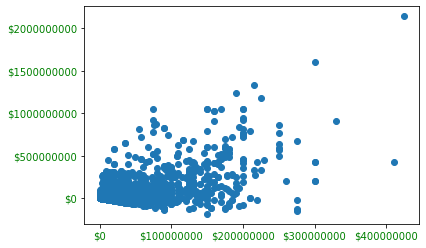

In [225]:
fig, ax = plt.subplots()

ax.scatter(df['production_budget'], df['net_profit'])

ax.xaxis.set_major_formatter('${x:1.0f}')
ax.xaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
ax.yaxis.set_major_formatter('${x:1.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)

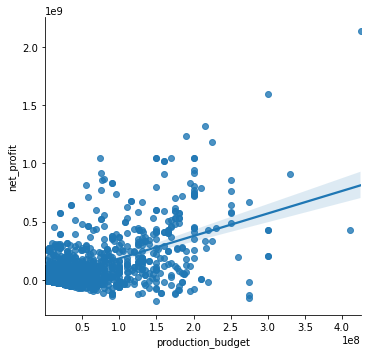

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# sns.scatterplot(data = df_m, x = "production_budget", y = "net_profit", hue="net_profit")
# ax.xaxis.set_major_formatter('${x:1.0f}')
# ax.xaxis.set_tick_params(which='major', labelcolor='green',
#                          labelleft=True, labelright=False)
# ax.yaxis.set_major_formatter('${x:1.0f}')
# ax.yaxis.set_tick_params(which='major', labelcolor='green',
#                          labelleft=True, labelright=False)

sns.lmplot(data = df_m, x = "production_budget", y = "net_profit")
plt.show()

# Ratings bucket


In [247]:
rt_ratings_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', error_bad_lines=False)

In [248]:
response = requests.get('https://api.themoviedb.org/3/movie/10191?api_key=' + api_key + '&language=en-US&append_to_response=release_dates')

In [249]:
response.json()['release_dates']['results'][0]['release_dates'][0]['certification']

'U'

In [250]:
rt_ratings_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [251]:
# df = tmdb_df.merge(budget_df, left_on='original_title', right_on='movie')

# Releases by date

Show averege amount of releases per month for 2010 - 2019

Show revenue and maybe also gross profit for 2010-2019

In [252]:
date_df = df
date_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,net_profit,year,date,month
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,165000000,217581232,494870992,329870992,247370992.0,2010,2010-03-26,3
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,170000000,312433331,621156389,451156389,366156389.0,2010,2010-05-07,5
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,160000000,292576195,835524642,675524642,595524642.0,2010,2010-07-16,7
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874,128050874,80550874.0,2010,2010-02-11,2
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,Toy Story 3,200000000,415004880,1068879522,868879522,768879522.0,2010,2010-06-17,6


In [253]:
# https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas

date_df['year'] = pd.DatetimeIndex(date_df['release_date']).year


<ipython-input-253-1f2ec8893897>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['year'] = pd.DatetimeIndex(date_df['release_date']).year


In [254]:
date_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,net_profit,year,date,month
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,165000000,217581232,494870992,329870992,247370992.0,2010,2010-03-26,3
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,170000000,312433331,621156389,451156389,366156389.0,2010,2010-05-07,5
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,160000000,292576195,835524642,675524642,595524642.0,2010,2010-07-16,7
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874,128050874,80550874.0,2010,2010-02-11,2
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,Toy Story 3,200000000,415004880,1068879522,868879522,768879522.0,2010,2010-06-17,6


In [255]:
date_df["release_date"] = df["release_date"].astype("datetime64")


<ipython-input-255-d3a1cce7f47c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df["release_date"] = df["release_date"].astype("datetime64")


In [256]:
# https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

mask = (date_df['release_date'] > '2010-1-1') & (date_df['release_date'] <= '2019-12-31')
df.loc[mask]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,net_profit,year,date,month
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,165000000,217581232,494870992,329870992,247370992.0,2010,2010-03-26,3
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,170000000,312433331,621156389,451156389,366156389.0,2010,2010-05-07,5
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,160000000,292576195,835524642,675524642,595524642.0,2010,2010-07-16,7
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874,128050874,80550874.0,2010,2010-02-11,2
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,Toy Story 3,200000000,415004880,1068879522,868879522,768879522.0,2010,2010-06-17,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,[],509316,en,The Box,0.600,2018-03-04,The Box,8.0,1,The Box,25000000,15051977,34356760,9356760,-3143240.0,2018,2018-03-04,3
2312,[10402],509306,en,The Box,0.600,2018-03-04,The Box,6.0,1,The Box,25000000,15051977,34356760,9356760,-3143240.0,2018,2018-03-04,3
2313,"[35, 16]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,Enough,38000000,39177215,50970660,12970660,-6029340.0,2018,2018-03-22,3
2314,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,Undiscovered,9000000,1069318,1069318,-7930682,-12430682.0,2018,2018-04-07,4


In [257]:
df['date'] = df['release_date']

<ipython-input-257-3934113228b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['release_date']


In [258]:
mask = (df['date'] > '2010-1-1') & (df['release_date'] <= '2019-12-31')
df = df.loc[mask]

In [259]:
df['date'] = df['date'].astype("datetime64")
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


# make releaset date index

<AxesSubplot:xlabel='year', ylabel='count'>

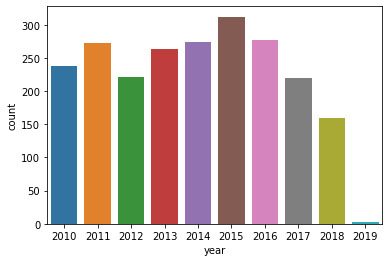

In [264]:
#james in class

df['year'].plot(kind="hist")

sns.countplot(data = df, x = 'year')



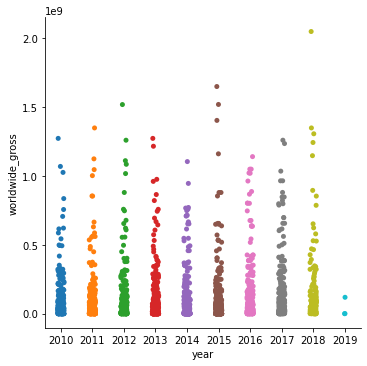

In [265]:
sns.catplot(data = df, x = 'year',  y = 'worldwide_gross')

C:\Users\Johnny\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Johnny\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Johnny\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Johnny\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Johnny\anaconda3\envs\learn-env

<AxesSubplot:xlabel='year', ylabel='worldwide_gross'>

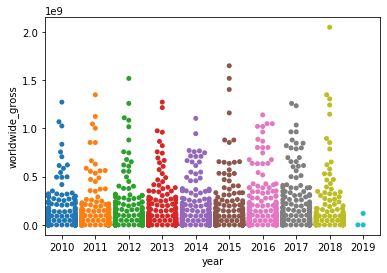

In [266]:
sns.swarmplot(data = df, x = 'year',  y = 'worldwide_gross')

<AxesSubplot:xlabel='year', ylabel='production_budget'>

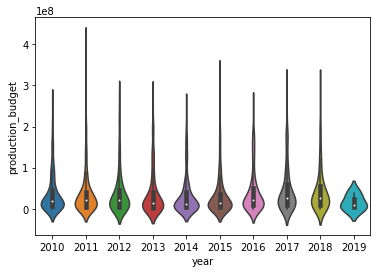

In [268]:
sns.violinplot(data = df, x = 'year',  y = 'production_budget')